# Results - ENEGEP.

Os resultados serão utilizados para a publicação de um artigo no Encontro Nacional de Engenharia de Produção. 

## Libraries and DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import skopt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score

dados= pd.read_csv(r"C:\Users\Matheus\Desktop\Mestrado\Projeto\machine-learning-anatel-database\raw_data\Anatel.csv")

linhas= dados.index
colunas= dados.columns

Data_Filter = dados.copy()

Data_Filter = Data_Filter[ dados["ANO_BASE"] > 2016]
#Data_Filter = Data_Filter[ dados["OPERADORA"] == "VIVO"]


Data_Filter["ESTADO"] = Data_Filter["ESTADO"].astype('category').cat.codes
Data_Filter["OPERADORA"] = Data_Filter["OPERADORA"].astype('category').cat.codes
Data_Filter.drop("Q2", inplace= True, axis = 1)
Data_Filter.drop("Q2_1", inplace= True, axis = 1)
Data_Filter.drop("Q2_2", inplace= True, axis = 1)
Data_Filter.drop("Q3", inplace= True, axis = 1)
Data_Filter.drop("Q4", inplace= True, axis = 1)
Data_Filter.drop("Q7a", inplace= True, axis = 1)
Data_Filter.drop("A2_1", inplace= True, axis = 1)
Data_Filter.drop("A2_2", inplace= True, axis = 1)
Data_Filter.drop("A2_3", inplace= True, axis = 1)
Data_Filter.drop("A1_4", inplace= True, axis = 1)
Data_Filter.drop("A3", inplace= True, axis = 1)
Data_Filter.drop("A4", inplace= True, axis = 1)
Data_Filter.drop("IDTNS", inplace= True, axis = 1)
Data_Filter.drop("G1", inplace= True, axis = 1)
Data_Filter.drop("G2_1", inplace= True, axis = 1)
Data_Filter.drop("G2_2", inplace= True, axis = 1)
Data_Filter.drop("G2_3", inplace= True, axis = 1)
Data_Filter.drop("E2", inplace= True, axis = 1)
Data_Filter.drop("E4", inplace= True, axis = 1)
Data_Filter.drop("E6", inplace= True, axis = 1)
Data_Filter.drop("E8", inplace= True, axis = 1)
Data_Filter.drop("F2_1", inplace= True, axis = 1)
Data_Filter.drop("F2_2", inplace= True, axis = 1)
Data_Filter.drop("F2_3", inplace= True, axis = 1)
Data_Filter.drop("F4_1", inplace= True, axis = 1)
Data_Filter.drop("F4_2", inplace= True, axis = 1)
Data_Filter.drop("F4_3", inplace= True, axis = 1)
Data_Filter.drop("I1", inplace= True, axis = 1)
Data_Filter.drop("PESO", inplace= True, axis = 1)
Data_Filter.drop("Q1", inplace= True, axis = 1)
Data_Filter.drop("Q6", inplace= True, axis = 1)
Data_Filter.drop("H3", inplace= True, axis = 1)
Data_Filter.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter.drop("H2a", inplace= True, axis = 1)
Data_Filter.drop("I2", inplace= True, axis = 1)
Data_Filter.drop("TIPO", inplace= True, axis = 1)
Data_Filter.drop("DATA", inplace= True, axis = 1)
Data_Filter.drop("H0", inplace= True, axis = 1)





Data_Filter["A1_2"] = Data_Filter["A1_2"].replace(2,1)
Data_Filter["A1_3"] = Data_Filter["A1_3"].replace(3,1)
Data_Filter["A1_2"] = Data_Filter["A1_2"].fillna(2)
Data_Filter["A1_3"] = Data_Filter["A1_3"].fillna(2)
Data_Filter["A1_1"] = Data_Filter["A1_1"].fillna(2)



Data_Filter = Data_Filter[Data_Filter.J1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_3 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.H1 != 99]


Data_Filter.loc[Data_Filter.J1 >= 6, "J1"] = "SATISFEITO"
Data_Filter.loc[Data_Filter.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"

Data_Filter["J1"] = Data_Filter["J1"].replace("SATISFEITO",1)
Data_Filter["J1"] = Data_Filter["J1"].replace("INSATISFEITO",0)


def plot_roc_curve(fpr, tpr, legenda):
    plt.plot(fpr, tpr, linewidth = 2, label = legenda)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")

def plot_dict_bar(dict):
    plt.bar(range(len(dict)), list(dict.values()), align='center')
    plt.xticks(range(len(dict)), list(dict.keys()), rotation=90)
    plt.show()

#Data_Filter.info()

Dados_Y = Data_Filter["J1"].copy()
Dados_X = Data_Filter.copy()
Dados_X.drop("J1", inplace= True, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Dados_X, Dados_Y, test_size=0.3,random_state=109) # 70% training and 30% tes

C:\Users\Matheus\AppData\Local\Temp\ipykernel_3512\3230109605.py:27: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  dados= pd.read_csv(r"C:\Users\Matheus\Desktop\Mestrado\Projeto\machine-learning-anatel-database\raw_data\Anatel.csv")


In [2]:
Rand_Forest_Class = RandomForestClassifier()
Knn_Class = KNeighborsClassifier()
logisticRegr = LogisticRegression()
SVM_Class = SVC(kernel='linear', probability=True) # rbf  Kernel

In [3]:
classifiers = dict()

classifiers = {"RF": Rand_Forest_Class, "KNN": Knn_Class, "LR": logisticRegr}


Técnica: RF


Accuracy: 0.8817685423934476
Precisão: 0.906800867485959
Recall: 0.9187559862527467
F1Score: 0.9127392813164671
AUC Score: 0.9447188721342
Técnica: KNN


Accuracy: 0.851964204459275
Precisão: 0.8619229361635384
Recall: 0.9288410614682517
F1Score: 0.8941316845644864
AUC Score: 0.893672566742028
Técnica: LR


Accuracy: 0.8701274078568179
Precisão: 0.8849295926045362
Recall: 0.9276578962195053
F1Score: 0.9057901251547242
AUC Score: 0.9327058013672912


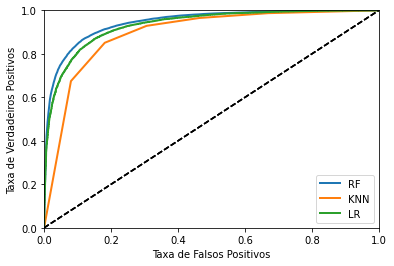

In [9]:
for i in classifiers:
    classifiers[i].fit(X_train, y_train)
    y_pred = classifiers[i].predict(X_test)
    print("Técnica:", i)
    print("\n")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_pred_prob = classifiers[i].predict_proba(X_test)
    y_pred_prob = y_pred_prob[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    pr = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    F1 = f1_score(y_test, y_pred)
    print("Precisão:", pr)
    print("Recall:", rec)
    print("F1Score:", F1)
    fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
    plot_roc_curve(fprKNN,tprKNN,  i)
    aucKNN = roc_auc_score(y_test,y_pred_prob)
    print("AUC Score:",aucKNN)
    print("\n")



## KNN

### Resultados Default

Accuracy: 0.851964204459275
Precisão: 0.8619229361635384
Recall: 0.9288410614682517
F1Score: 0.8941316845644864
AUC Score: 0.893672566742028


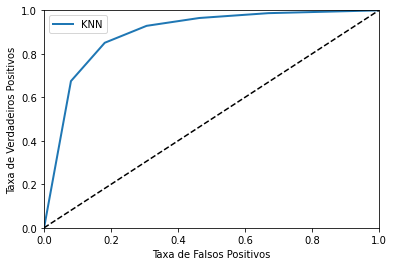

In [6]:
Knn_Class = KNeighborsClassifier()

Knn_Class.fit(X_train, y_train)
y_pred = Knn_Class.predict(X_test)
y_pred_prob = Knn_Class.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "KNN")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("AUC Score:",aucKNN)

## SVM

### Default


Accuracy: 0.7980812983467314
Precisão: 0.8022576878162709
Recall: 0.9289537438728942
F1Score: 0.8609696874755228
AUC Score: 0.7287402993801482


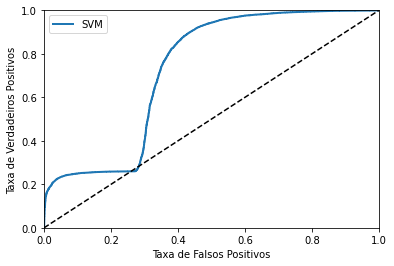

In [7]:
SVM_Class.fit(X_train, y_train)
y_pred = SVM_Class.predict(X_test)
y_pred_prob = SVM_Class.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)

fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "SVM")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
print("AUC Score:",aucKNN)

## LR

### Default

Accuracy: 0.8701274078568179
Precisão: 0.8849295926045362
Recall: 0.9276578962195053
F1Score: 0.9057901251547242
AUC Score: 0.9327058013672912


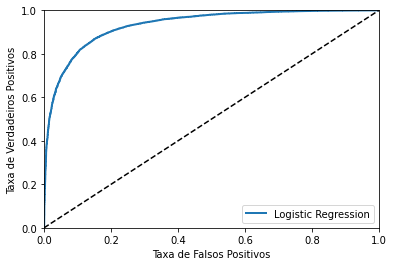

In [14]:


classifiers["LR"].fit(X_train, y_train)
y_pred = classifiers["LR"].predict(X_test)
y_pred_prob = classifiers["LR"].predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "Logistic Regression")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("AUC Score:",aucKNN)

## Random Forest

### Default

Accuracy: 0.8824131654785379
Precisão: 0.9070245637434701
Recall: 0.9195447630852442
F1Score: 0.9132417536300814
AUC Score: 0.9436273503626376


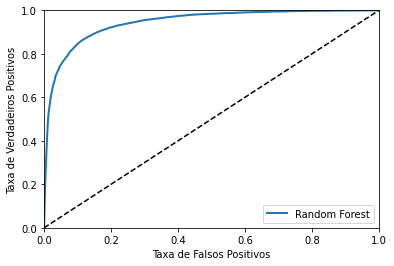

In [16]:
classifiers["RF"].fit(X_train, y_train)
y_pred = classifiers["RF"].predict(X_test)
y_pred_prob = classifiers["RF"].predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "Random Forest")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("AUC Score:",aucKNN)

# Optimize Params

In [4]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

## Random Forest

In [14]:
search_space = {"bootstrap": Categorical([True, False]), # values for boostrap can be either True or False
        "max_depth": Integer(6, 24, 'uniform'), # values of max_depth are integers from 6 to 20
        "min_samples_leaf": Integer(2, 4,'uniform'),
        "min_samples_split": Integer(2, 4, 'uniform'),
        "n_estimators": Integer(200, 400, 'uniform')
    }

forest_clf = RandomForestClassifier()

forest_bayes_search = BayesSearchCV(forest_clf, search_space, n_iter=10, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1)

forest_bayes_search.fit(X_train, y_train) 

forest_bayes_search.best_score_

forest_bayes_search.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=293)

Accuracy: 0.8826406795085697
Precisão: 0.9047619047619048
Recall: 0.9227562116175559
F1Score: 0.9136704694429724
AUC Score: 0.9463722378101582


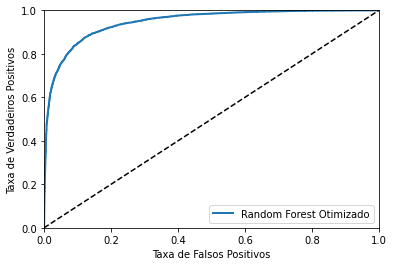

In [15]:
forest_bayes_search.fit(X_train, y_train)
y_pred = forest_bayes_search.predict(X_test)
y_pred_prob = forest_bayes_search.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "Random Forest Otimizado")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("AUC Score:",aucKNN)

## Logistic Regression

In [20]:
search_space = {"penalty":  Categorical(['l2', 'none']), # values of max_depth are integers from 6 to 20
        "tol": Real(1e-6, 1e-2, 'uniform'),
        "fit_intercept": Categorical([True, False]),
        "max_iter": Integer(100,500, 'uniform')
    }

logistic_clf = LogisticRegression()

logistic_clf_search = BayesSearchCV(logistic_clf, search_space, n_iter=20, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1)

logistic_clf_search.fit(X_train, y_train) 

logistic_clf_search.best_score_

logistic_clf_search.best_estimator_

LogisticRegression(max_iter=354, penalty='none', tol=0.005545298028302045)

C:\Users\Matheus\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Matheus\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Accuracy: 0.8701274078568179
Precisão: 0.8849295926045362
Recall: 0.9276578962195053
F1Score: 0.9057901251547242
AUC Score: 0.9327057948334627


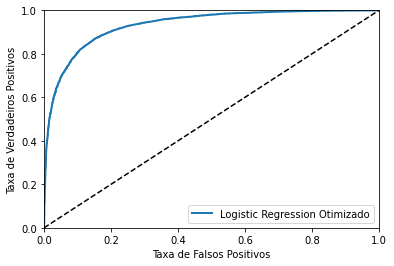

In [21]:
logistic_clf_search.fit(X_train, y_train)
y_pred = logistic_clf_search.predict(X_test)
y_pred_prob = logistic_clf_search.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "Logistic Regression Otimizado")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("AUC Score:",aucKNN)

## KNN

# Free Notes

Sim - 1

Não - 2

Satisfeito - 1

Insatisfeito - 0


Obs: SVM demorou 5m para rodar 

Obs: SVM com curva ROC demorou 87min para rodar =/

## Optimizer
Tempo de Otimização - Random Forest 9min

> Deve ser alocado a distribuição dos parâmetros no SearchSpace - foi usado Uniforme. 